### Copy of Process_CoreBx_multi

#### ...for testing the histogram

Read the interpolated DEMs and do volume calcs

This reads the .nc files created by `CoreBx_multi`

TODO:
* Correct aspect ratio on maps?
* Equal axes for all line plots?
* Add labels to colorbars
* Add a), b), ...
* Remove titles?
* If the x, y labeling changes in CoreBx_multi, then correct here too.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
# from dask.distributed import LocalCluster
from scipy import interpolate, signal
%matplotlib inline

In [2]:
# define all of the functions by runnng this python file
%run -i CoreBx_funcs

In [3]:
# default blue
dblue = '#1f77b4'

In [4]:
# This block is copied from CoreBx_multi, with addition of xs_end and d_end

# Make an array of dicts, where analysis region is defined by:
#  name
#  e0 - UTM Easting of origin [m]
#  n0 - UTM Northing of origin [m]
#  xlen - Length of alongshore axis [m]
#  ylen - Length of cross-shore axis [m]
#  dxdy - grid size (must be isotropic right now) [m]
#  theta - rotation CCW from x-axis [deg]
#  xs_end - number of grid cells to approximate limit of overwash terrace
#  d_end - number of grid cells to 

# regions = [
#            {'name':"region_4","e0": 387330.,"n0": 3864280.,"xlen": 4000.,"ylen": 700.,"dxdy": 1.,"theta": 45.,'xs_end':400,'d_end':200}]

regions = [{'name':"region_1","e0": 380400.,"n0": 3858160.,"xlen": 3400.,"ylen": 600.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':300},
           {'name':"region_2","e0": 383440.,"n0": 3860830.,"xlen": 3990.,"ylen": 700.,"dxdy": 1.,"theta": 41.,'xs_end':300,'d_end':200},
           {'name':"region_3","e0": 386485.,"n0": 3863430.,"xlen": 1200.,"ylen": 700.,"dxdy": 1.,"theta": 44.,'xs_end':350,'d_end':200},
           {'name':"region_4","e0": 387330.,"n0": 3864280.,"xlen": 4000.,"ylen": 700.,"dxdy": 1.,"theta": 45.,'xs_end':400,'d_end':200},
           {'name':"region_5","e0": 390140.,"n0": 3867115.,"xlen": 3400.,"ylen": 700.,"dxdy": 1.,"theta": 43.75,'xs_end':350,'d_end':200},
           {'name':"region_6","e0": 392600.,"n0": 3869450.,"xlen": 2440.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':200},
           {'name':"region_7","e0": 394430.,"n0": 3871065.,"xlen": 3220.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':200},
           {'name':"region_8","e0": 396800.,"n0": 3873240.,"xlen": 3500.,"ylen": 700.,"dxdy": 1.,"theta": 42.,'xs_end':400,'d_end':250},
           {'name':"region_9","e0": 399400.,"n0": 3875580.,"xlen": 3300.,"ylen": 700.,"dxdy": 1.,"theta": 40.,'xs_end':450,'d_end':250}]


region_1
Shape dhi:  (2, 3400)
Shape x:  (3400,)

region_2


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\xarray\core\nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
CoreBx_funcs.py:42: RuntimeWarning: invalid value encountered in less_equal
  mad = np.nanmean(np.abs(mp),axis=(1,2))
CoreBx_funcs.py:62: RuntimeWarning: invalid value encountered in true_divide
  def map_stats2d(mp):


Shape dhi:  (2, 3990)
Shape x:  (3990,)

region_3
Shape dhi:  (2, 1200)
Shape x:  (1200,)

region_4
Shape dhi:  (2, 4000)
Shape x:  (4000,)

region_5
Shape dhi:  (2, 3400)
Shape x:  (3400,)

region_6
Shape dhi:  (2, 2440)
Shape x:  (2440,)

region_7
Shape dhi:  (2, 3220)
Shape x:  (3220,)

region_8
Shape dhi:  (2, 3500)
Shape x:  (3500,)

region_9
Shape dhi:  (2, 3300)
Shape x:  (3300,)


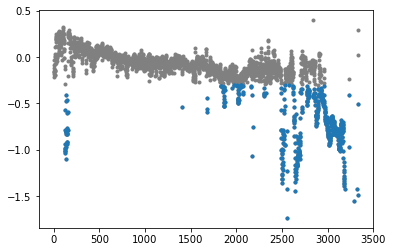

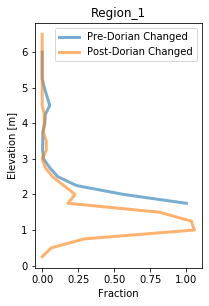

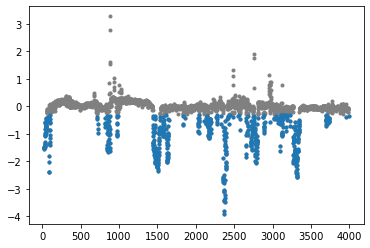

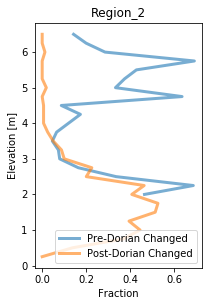

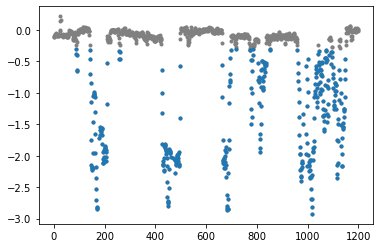

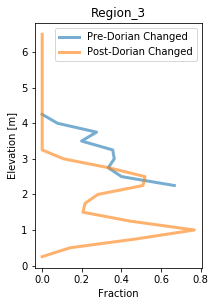

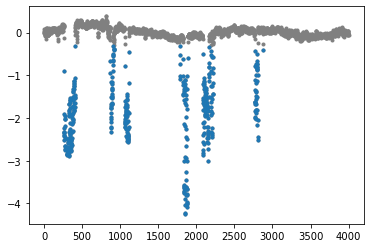

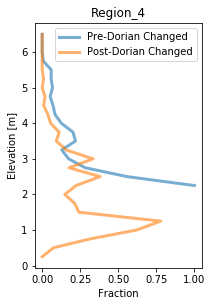

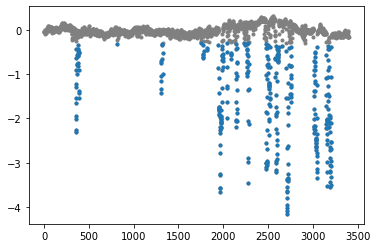

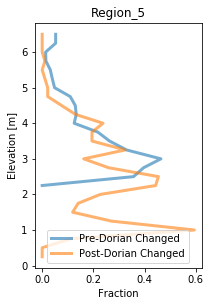

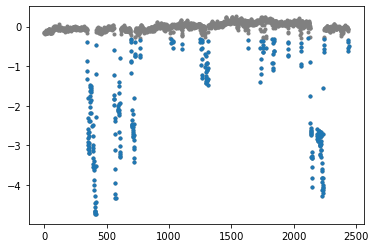

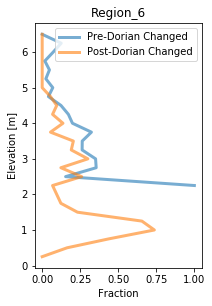

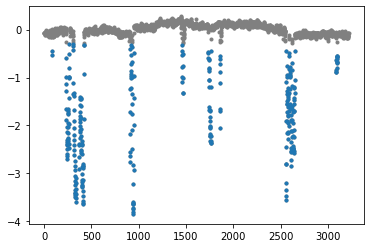

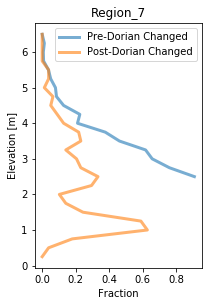

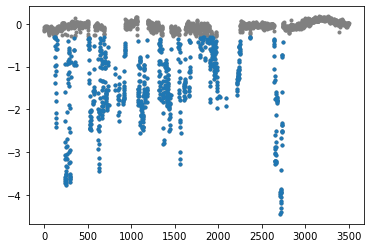

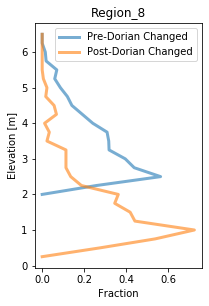

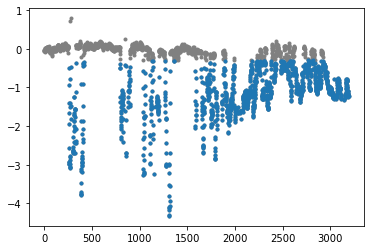

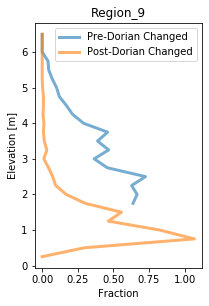

In [5]:
vsum = 0.
vsumall = 0.
vchangeall = 0.
vchange=0.
island_length=0.

bin_edges = np.arange(0,6.75,.25)
h0all = np.zeros_like(bin_edges[0:-1])
h1all = np.zeros_like(bin_edges[0:-1])
h2all = np.zeros_like(bin_edges[0:-1])


for r in regions:
    print()
    print(r['name'])
    fn = r['name']+'.nc'
    dsa = xr.open_dataset(fn)
    dsaa = np.squeeze(dsa.to_array())
    # print(dsaa)

    # The first SfM map is about 17 cm high...correct that.
    dsaa[0,:,:] = dsaa[0,:,:] - 0.17 

    dsaa = dsaa.where(dsaa>=0.4)

    diffmap = np.squeeze(np.diff(dsaa,axis=0))

    tcmap=plt.cm.terrain
    tcmap.set_bad(color='darkgray')
    title_str = '{0:s}'.format(r['name'].capitalize())

    # calculate dhi
    dhi = dsaa[:,0:r['d_end'],:].max(axis=1,skipna=True).values
    print("Shape dhi: ",np.shape(dhi))
    mean_dhi = np.nanmean(dhi,1)
    std_dhi = np.nanstd(dhi,1)
    
    x = np.arange(0,np.shape(dhi)[1])
    print("Shape x: ",np.shape(x))
    
    hdiff = np.squeeze(np.diff(dhi,1,0))   
    idx = np.where(hdiff<=-.3)
    
    
    fig = plt.figure()
    plt.plot(x,hdiff,'.',c='gray')
    plt.plot(x[idx],hdiff[idx],'.',c=dblue)
    
    # Histogram of all dhi
    h0, be = np.histogram(dhi[0,:],np.arange(0,6.75,.25),density=False)

    # Histogram of pre-storm dhi that change during storm
    h1, be = np.histogram(dhi[0,idx],np.arange(0,6.75,.25),density=False)

    # Histogram of post-storm dhs that change during storm
    h2, be = np.histogram(dhi[1,idx],np.arange(0,6.75,.25),density=False)

    # Same as above above, but scaled to 0-1
    h2s,be = np.histogram(dhi[1,idx],np.arange(0,6.75,.25),density=True)

    # Fraction of dhi in each elevation range that changed
    pct = h1/h0
    
    try:
        h0all=h0all+h0
        h1all=h1all+h1
        h2all=h2all+h2
    except:
        print('should not see this')
#         h0all=h0
#         h1all=h1
#         h2all=h2
    
    bin_centers = bin_edges[0:-1]+np.diff(bin_edges)

#     # Histogram of dune crest elevations
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.plot( h0, bin_centers,linewidth=3,alpha=.6, label="All Pre-Dorian" )
#     plt.plot( h1, bin_centers,linewidth=3,alpha=.6, label="Pre-Dorian Changed" )
#     plt.plot( h2, bin_centers,linewidth=3,alpha=.6, label="Post-Dorian Changed")
#     plt.legend()
#     ax.set_ylabel("Elevation [m]")
#     ax.set_xlabel("Count")
    
    # Histogram
    fig = plt.figure(figsize=(3,4.5))
    ax = plt.subplot(111)
    plt.plot( pct, bin_centers,linewidth=3,alpha=.6, label="Pre-Dorian Changed")
    plt.plot( h2s, bin_centers,linewidth=3,alpha=.6, label="Post-Dorian Changed")
    plt.legend()
    ax.set_ylabel("Elevation [m]")
    ax.set_xlabel("Fraction")
    plt.title(title_str)

In [6]:
np.sum(h2sall)

NameError: name 'h2sall' is not defined

CoreBx_funcs.py:3: RuntimeWarning: invalid value encountered in true_divide
  import xarray as xr


Text(0.5, 1.0, 'All Regions')

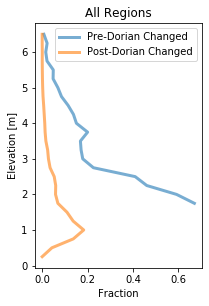

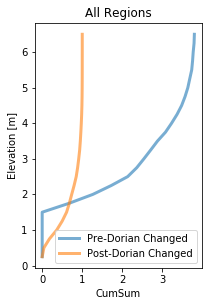

In [7]:
    # Histogram of all
    
    pctall = h1all/h0all
    h2sall = h2all/np.sum(h2all)
    fig = plt.figure(figsize=(3,4.5))
    ax = plt.subplot(111)
    plt.plot( pctall, bin_centers,linewidth=3,alpha=.6, label="Pre-Dorian Changed")
    plt.plot( h2sall, bin_centers,linewidth=3,alpha=.6, label="Post-Dorian Changed")
    plt.legend()
    ax.set_ylabel("Elevation [m]")
    ax.set_xlabel("Fraction")
    plt.title("All Regions")
    

    fig = plt.figure(figsize=(3,4.5))
    ax = plt.subplot(111)
    plt.plot(np.nancumsum (pctall), bin_centers,linewidth=3,alpha=.6, label="Pre-Dorian Changed")
    plt.plot(np.nancumsum (h2sall), bin_centers,linewidth=3,alpha=.6, label="Post-Dorian Changed")
    plt.legend()
    ax.set_ylabel("Elevation [m]")
    ax.set_xlabel("CumSum")
    plt.title("All Regions")

In [8]:
pctall

array([       nan,        nan,        nan,        nan,        nan,
              nan, 0.67060811, 0.59221658, 0.46082234, 0.40981341,
       0.22575517, 0.17867575, 0.171459  , 0.16844752, 0.20013708,
       0.15080645, 0.1376863 , 0.11438356, 0.08502252, 0.06917293,
       0.04807211, 0.04886562, 0.02123288, 0.01576577, 0.02169625,
       0.0075188 ])

In [11]:
np.nansum(pctall)

3.7981581481881075